# <center> **Ejercicio de Simulación Variables Aleatorias** </center>
## <font size=4> **Elements of Machine Learning 2025** </font> <font color=gray size=4> -- Alan Reyes-Figueroa </font>

In [1]:
import numpy as np             # cálculo numérico
import scipy.stats as st       # estadística

import matplotlib.pyplot as plt  # graficación
import seaborn as sns            # graficación

import pandas as pd            # manejo de datos y dataframes

### Experimento

Vamos a simular una variable aleatoria $X$ que cuenta el número de lanzamientos de una moneda con parámetro de éxito $0 \leq p \leq 1$ necesarios para que aparezca un 1 por primera vez. Este experimento se repetirá $N$ veces.

In [2]:
# PARÁMETROS

p = 0.4        # parámetro de probabilidad de éxito (0 <= p <= 1)
N = 10000      # número de repeticiones del experimento

In [3]:
# vector para guardar la muestra de resultados de X
sample = np.zeros(N).astype(np.uint8)

In [4]:
# EXPERIMENTO:

# Repetir N veces
for i in range(0, N):
    fin = 0
    count = 1
    
    # Repetir hasta que aparezca un 1
    while not fin:
        moneda = np.random.choice(2, p=[1-p,p], size=1)[0]
        if moneda == 1:
            fin = 1
        else:
            count = count + 1
    sample[i] = count

In [5]:
sample[:100]

array([ 6,  1,  2,  1,  2,  3,  3,  2,  4,  1,  5,  3,  2, 10,  2,  2,  2,
        6,  1,  1,  1,  2,  1,  4,  3,  1, 10,  2,  3,  3,  2,  1,  7,  6,
        2,  1,  5,  2,  1,  1,  5,  2,  2,  5,  1,  2,  4,  2,  2,  1,  5,
        4,  1,  4, 12,  3,  1,  2,  2,  1,  3,  6,  1,  1,  1, 11,  7,  1,
        2,  1,  1,  1,  2,  1,  2,  2,  1,  1,  4,  1,  2,  1,  1,  1,  2,
        3,  1,  2,  1,  1,  2,  2,  2,  1,  2,  1,  2,  2,  2,  4],
      dtype=uint8)

In [6]:
sample.max()

22

In [7]:
minn = sample.min()
maxx = sample.max()
print(minn, maxx)

1 22


In [8]:
bins = minn - maxx + 1
bins

/var/folders/f1/cqb0l9vj1qldx3pn1mfwcv640000gn/T/ipykernel_46758/4016852966.py:1: RuntimeWarning: overflow encountered in ubyte_scalars
  bins = minn - maxx + 1


236

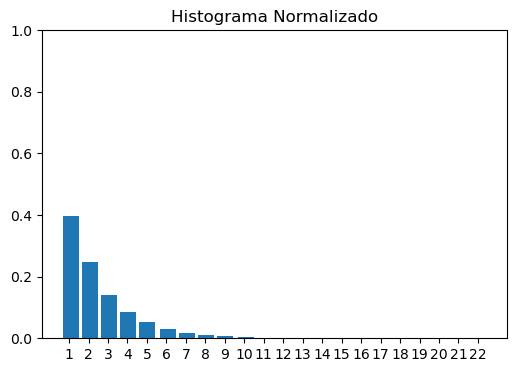

In [9]:
h = np.histogram(sample, bins=bins)
plt.figure(figsize=(6,4))
plt.title('Histograma Normalizado')
plt.bar(h[1][1:], h[0] / N)           # El histograma se divide entre N para obtener probabilidades (no conteos)
plt.ylim([0,1])                       # a este le llamamos el histograma normalizado.
plt.xticks(np.arange(minn, maxx+1))
plt.show()

La variable aleatoria $X$ se comporta como una distribución geométrica $Geom(p)$, y la gráfica anterior nos confirma este comportamiento.

In [10]:
sample.mean()

2.4904

El promedio o valor esperado de $X$ debe ser $\mathbb{E}(X) = \tfrac{1}{p}$.